# Ice Discharge
This script uses V87 of the 'Greenland Ice Sheet solid ice discharge from 1986 through last month: Discharge' dataset (Mankoff et al., 2020), downloaded from the GEUS dataverse (https://doi.org/10.22008/promice/data/ice_discharge/d/v02). This dataset provides estimated of solid ice discharge through algorithmically generated  glacier flux gates. Jakobshavn Isbrae, the focus of this study, is represented by Gate 184. 

In [1]:
# IMPORT REQUIRED MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# DEFINE THE MANKOFF CSV FILES TO COMBINE. 
csv_files = ['R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/gate_D.csv',
 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/gate_err.csv',
 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/gate_coverage.csv']

# Define the name of the new CSV file to store the extracted data
output_file = 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/jakobshavn_g184_discharge_2018_2023.csv'

The first block of this script extracts the discharge, error and coverage data for Gate 184 (Jakobshavn Isbrae), between 2018 and 2023. This data is saved to a new CSV, 'jakobshavn_g184_discharge_2018_2023.csv', which is saved to the 'ice_discharge_mankoff_2020' GitHub folder.

In [2]:
extracted_data = pd.DataFrame() 
for file in csv_files:
    df = pd.read_csv(file) 
    if '184' in df.columns:
        if 'gate_coverage' in file:
            extracted_data['coverage'] = df['184']
        elif 'gate_D' in file:
            extracted_data['discharge'] = df['184']
        elif 'gate_err' in file:
            extracted_data['error'] = df['184']
        date_column = [col for col in df.columns if 'date' in col.lower()]
        if date_column:
            extracted_data['date'] = pd.to_datetime(df[date_column[0]], format='%Y/%m/%d')

extracted_data = extracted_data[(extracted_data['date'] >= '2018-01-01') & (extracted_data['date'] <= '2022-12-31')]
extracted_data = extracted_data[['date', 'discharge', 'error', 'coverage']]
extracted_data.to_csv(output_file, index=False)

print(f'Data between 2018-01-01 and 2022-12-31 from the "184" column and date column of {len(csv_files)} CSV files has been extracted, filtered, ordered, and saved to {output_file} with named columns and date format.')

Data between 2018-01-01 and 2022-12-31 from the "184" column and date column of 3 CSV files has been extracted, filtered, ordered, and saved to R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/jakobshavn_g184_discharge_2018_2023.csv with named columns and date format.


The next section of this script uses the CSV saved above to plot a timeseries of ice discharge between 2018 and 2023, including the associated error. The data is filtered based on the coverage percentage; a threshold of 50% is currently used, following the method of Mankoff et al. (2020).

In [3]:
file = 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/jakobshavn_g184_discharge_2018_2023.csv'
df = pd.read_csv(file)
discharge = df['discharge']
error = df['error']
coverage = df['coverage']
date = pd.to_datetime(df['date'], format='%Y/%m/%d')
mask = coverage > 0.5 # coverage percentage threshold

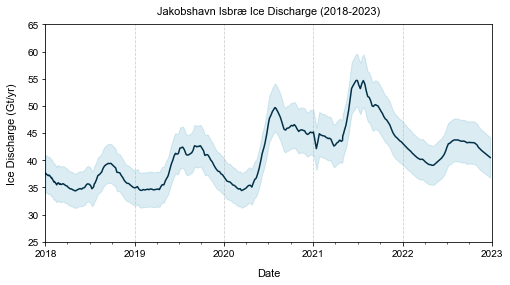

In [4]:
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.title('Jakobshavn Isbræ Ice Discharge (2018-2023)', pad=10, fontsize=11)
plt.ylabel("Ice Discharge (Gt/yr)", labelpad=10, fontsize=11)
plt.xlabel('Date', labelpad=10, fontsize=11)

# Plot discharge between 2018 and 2023, with the associated error
ax.plot(date[mask], discharge[mask], '#023047')
ax.fill_between(date[mask], discharge[mask] - error[mask], discharge[mask] + error[mask], alpha=0.2, color='#4ba3c3')

# Set the x-axis major ticks to be on the first of January for each year from 2018 to 2023
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)

# Set the y-axis tick limits
plt.ylim(25, 65)
plt.yticks(np.arange(25, 65+1, 5))

plt.show()